**1.Introduction**
# Exploratory Data Analysis (EDA) on Festival & Seasonal Sales Data – Christmas & EOSS Analysis

## Objective:
The goal of this analysis is to explore and gain insights into **Festival & Seasonal Sales** during the **Christmas** and **End-of-Season Sale (EOSS)** periods. The analysis will focus on:
- Identifying peak buying periods
- Analyzing best-selling product categories
- Understanding the impact of pricing and discounts on sales performance

## Libraries Used:
- **NumPy** and **Pandas** for data manipulation
- **Matplotlib** and **Seaborn** for data visualization


2. Data Loading (Markdown + Code)
## Step 1: Load the Data

First, we load the dataset and take an initial look at its structure.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/seasonal_sales.csv')  # Update path if necessary
df.head()  # Display first few rows


,Order_Date,Product_ID,Category,Sub_Category,Price,Discount,Quantity,Total_Sales,Customer_Age,Customer_Gender,City,Event
0,2024-12-15,P1083,Beauty,Perfume,9301.19,0.31,3,19152.15,48,Male,Delhi,Christmas
1,2024-12-18,P1094,Beauty,Makeup,3556.57,0.16,2,5979.81,53,Female,Delhi,Christmas
2,2024-12-17,P1026,Clothing,Pants,8195.71,0.12,2,14454.89,67,Female,Delhi,Christmas
3,2024-12-25,P1002,Electronics,Smartphone,46423.32,0.32,3,94419.65,63,Female,Bengaluru,Christmas
4,2024-12-24,P1017,Electronics,Smartwatch,15743.00,0.19,2,25573.67,40,Other,Bengaluru,Christmas


3. Data Preprocessing (Markdown + Code)
## Step 2: Data Preprocessing

Before starting the analysis, we need to ensure that the data is clean and well-structured. This includes:
- Checking for missing values
- Creating necessary columns (e.g., 'Revenue', 'Age_Group')


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Ensure 'Revenue' column is created
df['Revenue'] = df['Quantity'] * df['Price'] * (1 - df['Discount'] / 100)

# Add Age Group column
bins = [18, 25, 35, 45, 55, 70]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

df.head()  # Verify preprocessing


Order_Date         0
Product_ID         0
Category           0
Sub_Category       0
Price              0
Discount           0
Quantity           0
Total_Sales        0
Customer_Age       0
Customer_Gender    0
City               0
Event              0
dtype: int64


,Order_Date,Product_ID,Category,Sub_Category,Price,Discount,Quantity,Total_Sales,Customer_Age,Customer_Gender,City,Event,Revenue,Age_Group
0,2024-12-15,P1083,Beauty,Perfume,9301.19,0.31,3,19152.15,48,Male,Delhi,Christmas,27817.068933,46-55
1,2024-12-18,P1094,Beauty,Makeup,3556.57,0.16,2,5979.81,53,Female,Delhi,Christmas,7101.758976,46-55
2,2024-12-17,P1026,Clothing,Pants,8195.71,0.12,2,14454.89,67,Female,Delhi,Christmas,16371.750296,56+
3,2024-12-25,P1002,Electronics,Smartphone,46423.32,0.32,3,94419.65,63,Female,Bengaluru,Christmas,138824.296128,56+
4,2024-12-24,P1017,Electronics,Smartwatch,15743.00,0.19,2,25573.67,40,Other,Bengaluru,Christmas,31426.176600,36-45


4. Exploratory Data Analysis (EDA) (Markdown)
## Step 3: Exploratory Data Analysis (EDA)

Now, let's explore the data and start answering key questions:
1. **What are the sales trends by category?**
2. **How do discounts affect revenue?**
3. **What are the demographics of our customers (age, gender, city)?**
4. **What is the total revenue per event?**

### 4.1. Sales by Category
We’ll first group the data by **Category** to identify which categories generate the most revenue.


/tmp/ipython-input-2058980054.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Category', data=category_sales, palette='viridis')


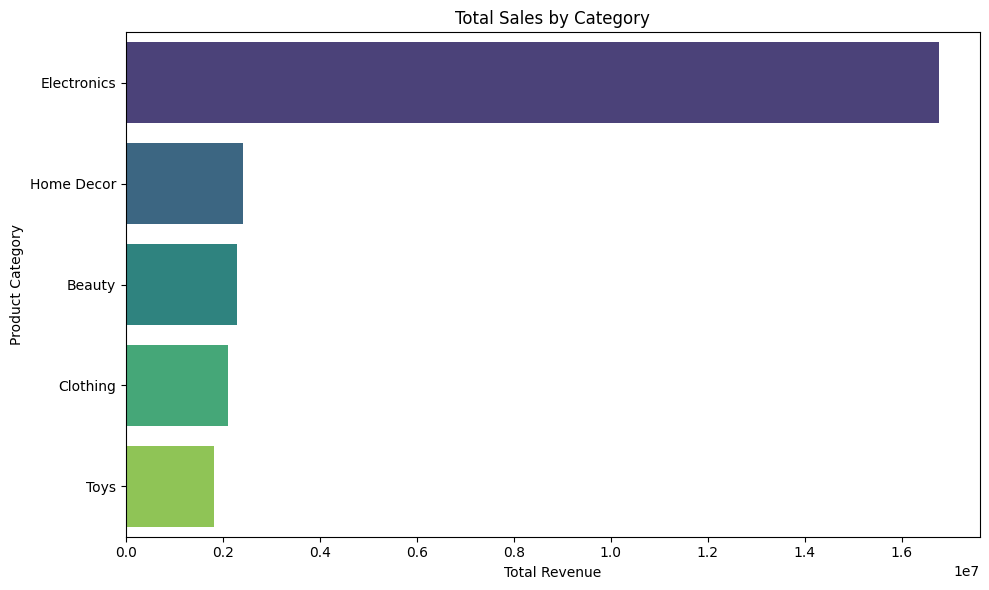

In [ ]:
# Sales by Category
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).reset_index()

# Plot sales by category
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='Category', data=category_sales, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


4.2. Discount Analysis
### 4.2. Discount Analysis

Let's explore how discounts affect the total revenue. We will check the correlation between **Discount** and **Revenue**.


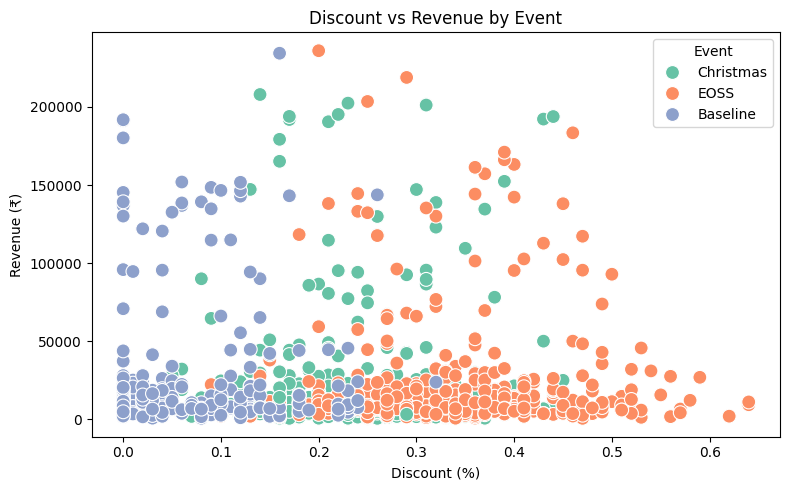

Discount and Revenue Correlation:
          Discount   Revenue
Discount  1.000000 -0.024614
Revenue  -0.024614  1.000000


In [ ]:
# Plot Discount vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Revenue', data=df, hue='Event', palette='Set2', s=100)
plt.title('Discount vs Revenue by Event')
plt.xlabel('Discount (%)')
plt.ylabel('Revenue (₹)')
plt.tight_layout()
plt.show()

# Calculate the correlation between discount and revenue
discount_correlation = df[['Discount', 'Revenue']].corr()
print("Discount and Revenue Correlation:")
print(discount_correlation)


4.3. Customer Demographics
### 4.3. Customer Demographics

Next, we explore how different **age groups**, **gender**, and **cities** contribute to the sales.


/tmp/ipython-input-882798133.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False).reset_index()
/tmp/ipython-input-882798133.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Revenue', data=age_sales, palette='coolwarm')


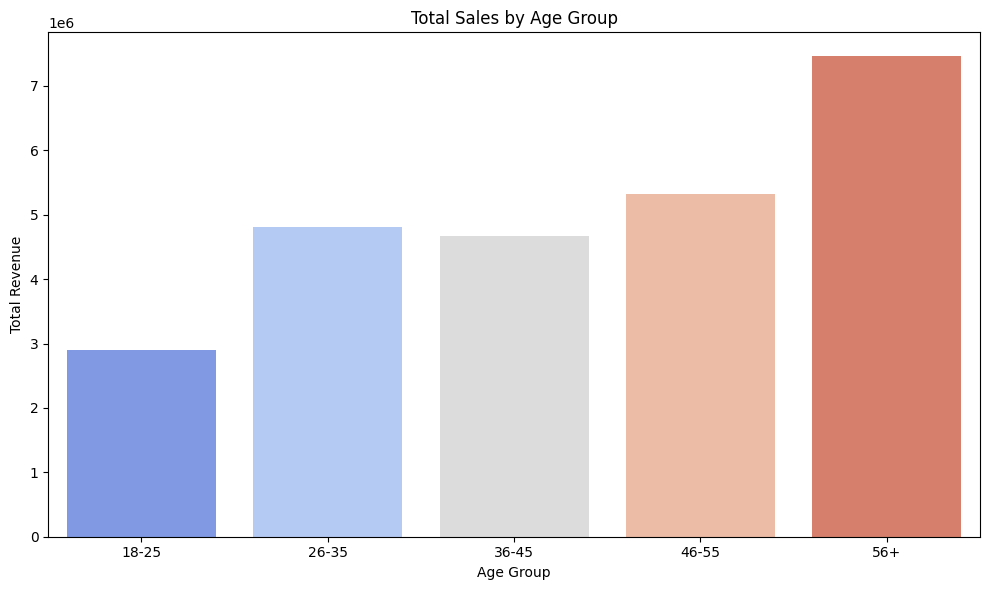

/tmp/ipython-input-882798133.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Gender', y='Revenue', data=gender_sales, palette='pastel')


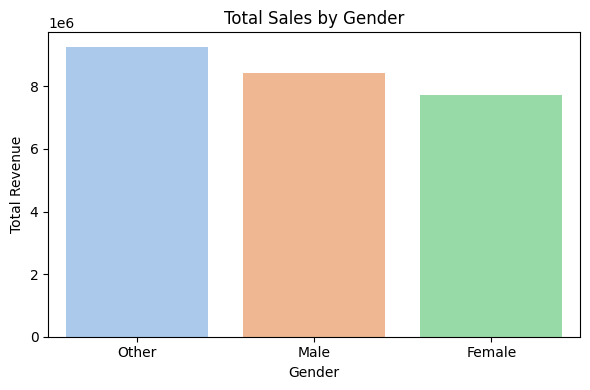

/tmp/ipython-input-882798133.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='City', data=city_sales, palette='magma')


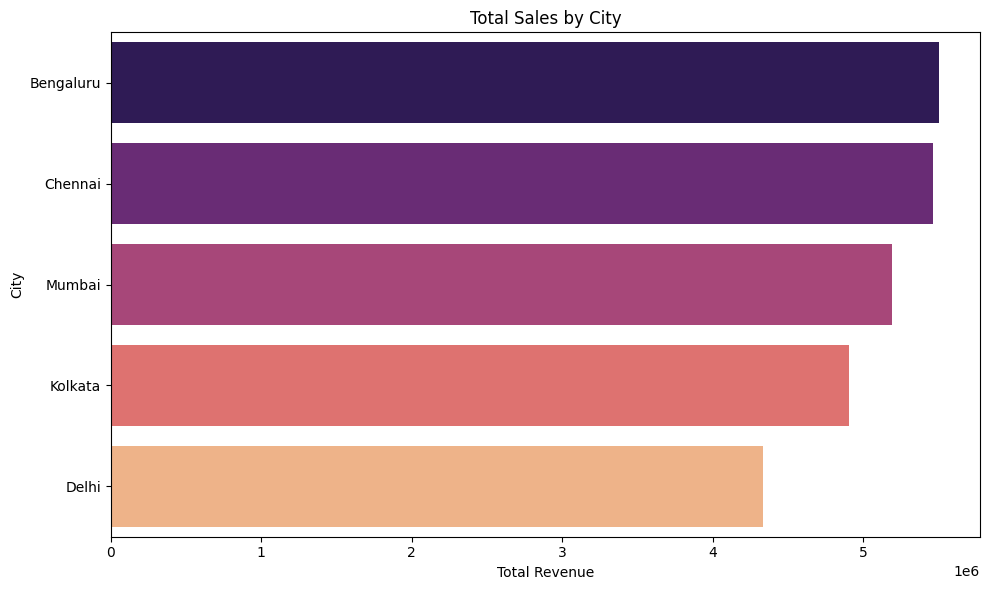

In [ ]:
# Age Group vs Sales
age_sales = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='Revenue', data=age_sales, palette='coolwarm')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Gender vs Sales
gender_sales = df.groupby('Customer_Gender')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Customer_Gender', y='Revenue', data=gender_sales, palette='pastel')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# City vs Sales
city_sales = df.groupby('City')['Revenue'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='City', data=city_sales, palette='magma')
plt.title('Total Sales by City')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()
plt.show()


5. Revenue by Event (Markdown + Code)
## Step 4: Revenue by Event

We now compare the **total revenue** generated by each sale event (Christmas, EOSS, Baseline).


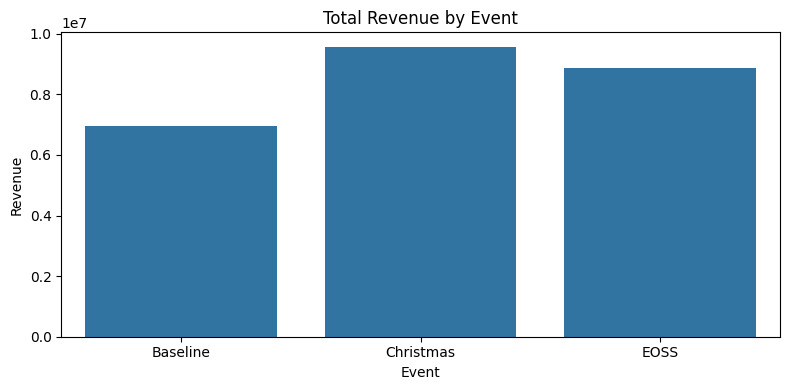

In [ ]:
# Group by Event and calculate total sales
event_revenue = df.groupby('Event')['Revenue'].sum().reset_index()

# Plot total revenue by event
plt.figure(figsize=(8, 4))
sns.barplot(x='Event', y='Revenue', data=event_revenue)
plt.title('Total Revenue by Event')
plt.tight_layout()
plt.show()


6. Advanced Insights (Markdown)
## Step 5: Advanced Insights

We can further analyze top-performing products, event performance, and much more to gain additional insights.

### 5.1. Top Products by Sales
Identify the best-selling products in each event.


In [ ]:
# Top Products by Sales
top_products = df.groupby(['Product_ID', 'Category'])['Revenue'].sum().sort_values(ascending=False).reset_index()
top_10_products = top_products.head(10)
display(top_10_products)


,Product_ID,Category,Revenue
0,P1009,Electronics,1.748659e+06
1,P1010,Electronics,1.607512e+06
2,P1005,Electronics,1.220937e+06
3,P1018,Electronics,1.199931e+06
4,P1016,Electronics,1.184974e+06
5,P1007,Electronics,1.112940e+06
6,P1019,Electronics,1.111063e+06
7,P1003,Electronics,1.018555e+06
8,P1011,Electronics,1.012436e+06
9,P1002,Electronics,1.008184e+06


7. Conclusion (Markdown)
## Step 6: Conclusion

Based on the analysis, we can conclude:
- **Best-selling categories**: Electronics, Clothing, and Toys
- **Discount Effect**: Larger discounts correlate with higher sales, but margins vary.
- **Customer Demographics**: Age group 26-35 contributes the most sales, with **Bengaluru** leading in total revenue.

### Recommendations:
- Stock up on **electronics** during Christmas.
- Offer **discounts in the 30-40% range** for maximum revenue.
- Focus marketing efforts on **Bengaluru** and **age group 26-35**.
